# Identitas

 Fariz Aditama / farizadtm27@gmail.com

# Install Modul

In [ ]:
!pip install split-folders

In [ ]:
!sudo apt install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 1s (42.2 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tree.
(Reading database ... 160772 files and directories currently instal

# Import Library

In [ ]:
import zipfile,os
import tensorflow as tf
import shutil
import splitfolders
import keras_preprocessing
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from google.colab import files
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import RMSprop
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

# Import dataset

In [ ]:
!wget --no-check-certificate \
    https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
    -O /tmp/rockpaperscissors.zip

--2021-06-11 02:30:59--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  3.74MB/s    in 63s     

2021-06-11 02:32:02 (4.86 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



# Dataset
Karena dataset yang digunakan memiliki format .zip maka sebelum digunakan kita perlu melakukan ekstrak file terlebih dahulu

## Ekstrak File

In [ ]:
# Pilih file yang ingin diekstrak
zip_file = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(zip_file,'r')
# Ekstrak ke dalam direktori yang diinginkan
zip_ref.extractall('/tmp/dicoding')
zip_ref.close()

## Split dataset 
Data yang sudah diekstrak kemudian dibagi setiap kelas(rock, paper & scissors) kedalam folder train dan validation

Agar mempersingkat proses maka kita akan menggunakan library splitfolders

In [ ]:
# Inisialisasi base direktori
base_dir = '/tmp/dicoding/rockpaperscissors/'

In [ ]:
# Split data setiap kelas dengan library splitfolders
splitfolders.ratio('/tmp/dicoding/rockpaperscissors/',
                    output ='/tmp/dicoding/rockpaperscissors/data_model',
                    seed=None, ratio=(.6,.4)) 
# Data secara otomatis akan terbagi kedalam 2 folder yaitu train(data training) dan val(data validation)

Copying files: 2189 files [00:00, 3016.04 files/s]


Pada folder yang sudah diekstrak terdapat folder yang tidak akan kita gunakan yaitu rps-cv-images, maka folder tersebut yang sudah terbagi pada train dan val perlu kita hapus

In [ ]:
!tree -d /tmp/dicoding/rockpaperscissors/data_model

/tmp/dicoding/rockpaperscissors/data_model
├── train
│   ├── paper
│   ├── rock
│   ├── rps-cv-images
│   └── scissors
└── val
    ├── paper
    ├── rock
    ├── rps-cv-images
    └── scissors

10 directories


In [ ]:
!rm -rf '/tmp/dicoding/rockpaperscissors/data_model/train/rps-cv-images'
!rm -rf '/tmp/dicoding/rockpaperscissors/data_model/val/rps-cv-images'

Setelah dilakukan split data, otomatis data sudah terbagi kedalam folder train dan validation

In [ ]:
#Training dan Validation
training_dir = "/tmp/dicoding/rockpaperscissors/data_model/train"
validation_dir = "/tmp/dicoding/rockpaperscissors/data_model/val"

# Rock
rock_dir = os.path.join('/tmp/dicoding/rockpaperscissors/rock')
train_rock_dir = os.path.join('/tmp/dicoding/rockpaperscissors/data_model/train/rock') 
val_rock_dir = os.path.join('/tmp/dicoding/rockpaperscissors/data_model/val/rock') 

# Paper
paper_dir = os.path.join('/tmp/dicoding/rockpaperscissors//paper')
train_paper_dir = os.path.join('/tmp/dicoding/rockpaperscissors/data_model/train/paper')
val_paper_dir = os.path.join('/tmp/dicoding/rockpaperscissors/data_model/val/paper')

# Scissors
scissors_dir = os.path.join('/tmp/dicoding/rockpaperscissors/scissors')
train_scissors_dir = os.path.join('/tmp/dicoding/rockpaperscissors/data_model/train/scissors')
val_scissors_dir = os.path.join('/tmp/dicoding/rockpaperscissors/data_model/val/scissors')

# Analisis Dataset

In [ ]:
# Melakukan pengecekan data yang sudah dibagi
print('Total Gambar:', len(os.listdir(rock_dir))+len(os.listdir(paper_dir))+ len(os.listdir(scissors_dir)))
print('Total Data Training:', len(os.listdir(train_rock_dir))+len(os.listdir(train_paper_dir))+ len(os.listdir(train_scissors_dir)))
print('Total Data Validation:', len(os.listdir(val_rock_dir))+len(os.listdir(val_paper_dir))+ len(os.listdir(val_scissors_dir)))

Total Gambar: 2188
Total Data Training: 1312
Total Data Validation: 876


# Augmentasi Gambar

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

# Data Generator 

In [ ]:
train_generator = train_datagen.flow_from_directory(
        training_dir,  #direktori train data yang sudah disiapkan
        target_size=(150, 150),  #mengubah resolusi gambar menjadi 150x150
        batch_size=4,
        class_mode='categorical') #karena klasifikasi yang akan dilakukan lebih dari 2 kelas maka menggunakan categorical

validation_generator = test_datagen.flow_from_directory(
        validation_dir, #direktori train data yang sudah disiapkan
        target_size=(150, 150), #mengubah resolusi gambar menjadi 150x150
        batch_size=4, 
        class_mode='categorical') #karena klasifikasi yang akan dilakukan lebih dari 2 kelas maka menggunakan categorical

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


# Sequential

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

# Compile Model

In [ ]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer=tf.optimizers.Adam(), 
              metrics=['accuracy'])

# Callback

Membuat class callback yang digunakan untuk menghentikan training ketika sudah mencapai accuracy diatas 96%

Callback sendiri dapat kita gunakan dalam berbagai macam case

In [ ]:
class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.96):  # berhenti training ketika accuracy diatas 96%
      self.model.stop_training = True

# Train Model

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=32,  # jumlah batch yang akan dieksekusi pada setiap epoch
      epochs=100,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2,
      callbacks=[Callback()])

Epoch 1/100
32/32 - 9s - loss: 1.1255 - accuracy: 0.3516 - val_loss: 1.1973 - val_accuracy: 0.1500
Epoch 2/100
32/32 - 8s - loss: 1.0728 - accuracy: 0.4141 - val_loss: 1.0220 - val_accuracy: 0.4500
Epoch 3/100
32/32 - 8s - loss: 1.0824 - accuracy: 0.4219 - val_loss: 0.9374 - val_accuracy: 0.6500
Epoch 4/100
32/32 - 8s - loss: 0.8598 - accuracy: 0.6641 - val_loss: 0.7893 - val_accuracy: 0.7000
Epoch 5/100
32/32 - 8s - loss: 0.7916 - accuracy: 0.6328 - val_loss: 0.6533 - val_accuracy: 0.8500
Epoch 6/100
32/32 - 8s - loss: 0.5241 - accuracy: 0.8047 - val_loss: 0.9040 - val_accuracy: 0.8000
Epoch 7/100
32/32 - 8s - loss: 0.5097 - accuracy: 0.8047 - val_loss: 0.7995 - val_accuracy: 0.6500
Epoch 8/100
32/32 - 8s - loss: 0.3871 - accuracy: 0.8594 - val_loss: 0.2706 - val_accuracy: 0.8500
Epoch 9/100
32/32 - 8s - loss: 0.5727 - accuracy: 0.7578 - val_loss: 0.2473 - val_accuracy: 0.9500
Epoch 10/100
32/32 - 8s - loss: 0.2947 - accuracy: 0.8984 - val_loss: 0.4712 - val_accuracy: 0.8500
Epoch 11/

# Grafik Result

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


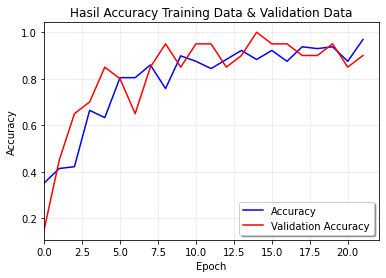

In [ ]:
plt.plot(history.history['accuracy'], label='Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Hasil Accuracy Training Data & Validation Data')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.xlim(xmin=0)
plt.legend(loc='best', shadow=True)
plt.show()

# Tes hasil training

Saving sadfasdf.jpg to sadfasdf.jpg
sadfasdf.jpg
This is Rock!


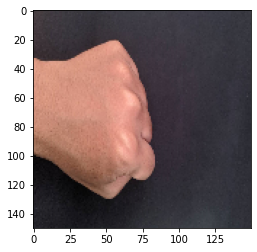

In [ ]:
uploaded = files.upload()
 
for fn in uploaded.keys(): 
  # memprediksi gambar yang akan diupload
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0,0] == 1:
    print("This is Paper!")
  elif classes[0,1] == 1:
    print("This is Rock!")
  else:
    print("This is Scissors!")